In [12]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importing classification models
from sklearn.tree import DecisionTreeClassifier
# importing ensemble learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#importing methods for model evaluation
from sklearn import metrics

In [13]:
# load dataset
df = pd.read_csv('air_index.csv')

In [14]:
df.head

<bound method NDFrame.head of          tanggal             stasiun  pm10   so2    co    o3   no2   max  \
0     2010-01-01  DKI1 (Bunderan HI)  60.0   4.0  73.0  27.0  14.0  73.0   
1     2010-01-02  DKI1 (Bunderan HI)  32.0   2.0  16.0  33.0   9.0  33.0   
2     2010-01-03  DKI1 (Bunderan HI)  27.0   2.0  19.0  20.0   9.0  27.0   
3     2010-01-04  DKI1 (Bunderan HI)  22.0   2.0  16.0  15.0   6.0  22.0   
4     2010-01-05  DKI1 (Bunderan HI)  25.0   2.0  17.0  15.0   8.0  25.0   
...          ...                 ...   ...   ...   ...   ...   ...   ...   
4378  2021-12-27  DKI1 (Bunderan HI)  52.0  61.0  15.0  20.0  15.0  71.0   
4379  2021-12-28  DKI1 (Bunderan HI)  51.0  53.0  15.0  18.0  13.0  65.0   
4380  2021-12-29  DKI1 (Bunderan HI)  31.0  54.0  10.0  24.0  11.0  54.0   
4381  2021-12-30  DKI1 (Bunderan HI)  55.0  53.0  16.0  23.0  14.0  71.0   
4382  2021-12-31  DKI1 (Bunderan HI)  62.0  52.0  23.0  20.0  14.0  85.0   

     critical categori  pm25  
0          CO   SEDANG   N

In [15]:
# check nama column, missing values dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   stasiun   4383 non-null   object 
 2   pm10      4171 non-null   float64
 3   so2       4208 non-null   float64
 4   co        4233 non-null   float64
 5   o3        4180 non-null   float64
 6   no2       4190 non-null   float64
 7   max       4374 non-null   float64
 8   critical  4273 non-null   object 
 9   categori  4383 non-null   object 
 10  pm25      365 non-null    float64
dtypes: float64(7), object(4)
memory usage: 376.8+ KB


In [16]:
df.columns

Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori', 'pm25'],
      dtype='object')

In [17]:
# drop columns
drop_column = ['tanggal', 'stasiun', 'max', 'critical', 'pm25']
df = df.drop(drop_column, axis = 1)

Disini kami drop column 'tanggal', 'stasiun', 'max', dan 'critical' karena menganggap bahwa columns tersebut tidak mempengaruhi hasil prediksi yang akan kami lakukan. Sedangkan untuk column 'pm25', kami drop dikarenakan column tersebut hanya memiliki 365 data yang terisi (hanya 8% data yang tersedia).

In [18]:
# lihat distribusi data dalam column 'categori'
df['categori'].value_counts(normalize = True)

SEDANG            0.699293
BAIK              0.240475
TIDAK SEHAT       0.035136
TIDAK ADA DATA    0.025097
Name: categori, dtype: float64

Terlihat bahwa ada 4 data yang ada di dalam column 'categori', yaitu SEDANG, BAIK, TIDAK SEHAT, dan TIDAK ADA DATA.

In [19]:
df = df[df['categori'] != 'TIDAK ADA DATA']

Karena TIDAK ADA DATA sebenarnya tidak termasuk dalam kategori indeks udara, maka row dengan data TIDAK ADA DATA dalam column 'categori' akan kami drop.

In [20]:
df['categori'].value_counts(normalize = True)

SEDANG         0.717295
BAIK           0.246665
TIDAK SEHAT    0.036040
Name: categori, dtype: float64

Setelah data selesai didrop, kami melihat distribusi column 'categori' kembali. Dari data di atas, dapat kami simpulkan bahwa kategori SEDANG memiliki bagian paling banyak dalam distribusi tersebut (71%).

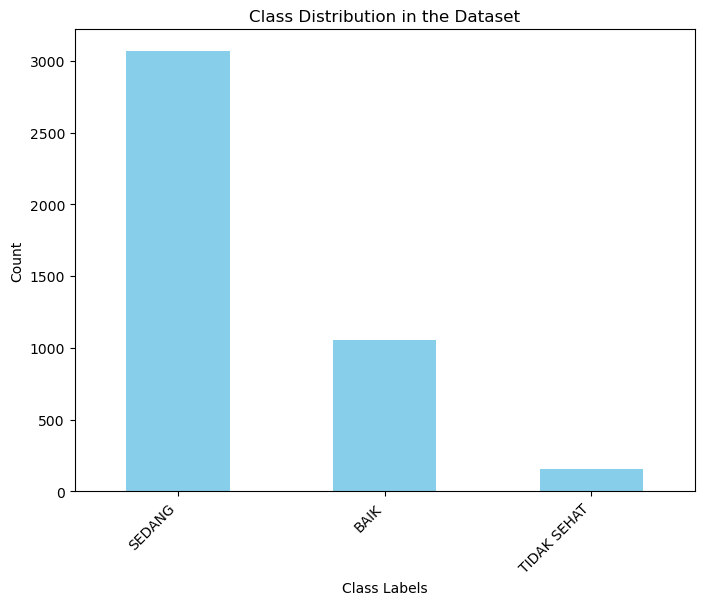

In [21]:
# Count the occurrences of each class
class_distribution = df['categori'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution in the Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

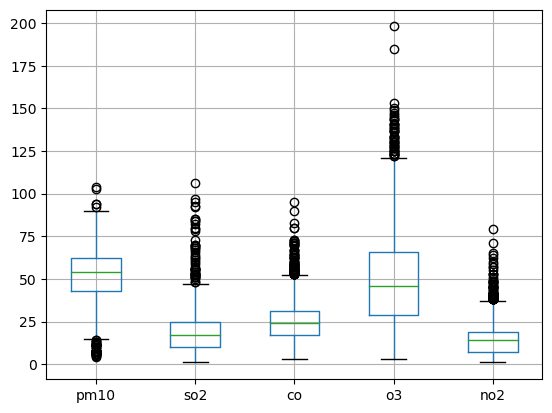

In [22]:
# check outliers
import matplotlib.pyplot as plt
box_plot = df.boxplot(column=['pm10', 'so2',  'co', 'o3', 'no2'])
plt.show()

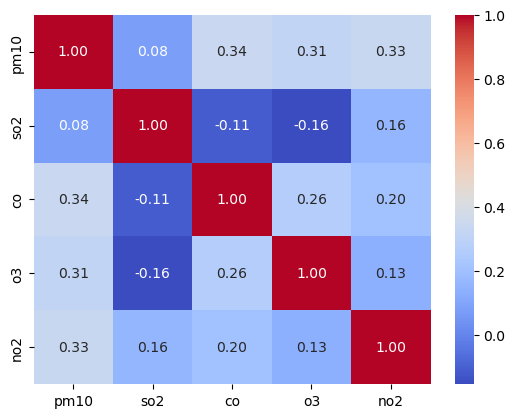

In [23]:
# plot heatmap to find out the correlation of variables
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [24]:
input_df = df.drop('categori', axis=1)
output_df = df['categori']

In [25]:
#split dataset to training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

# Handling missing values

In [26]:
print("Median pm10:", np.nanmedian(x_train['pm10']))
print("Median so2:", np.nanmedian(x_train['so2']))
print("Median co:", np.nanmedian(x_train['co']))
print("Median o3:", np.nanmedian(x_train['o3']))
print("Median no2:", np.nanmedian(x_train['no2']))

Median pm10: 55.0
Median so2: 18.0
Median co: 24.0
Median o3: 46.0
Median no2: 14.0


Karena columns dengan missing value memiliki outliers semua, maka kami akan menggunakan median untuk mengisi missing values tersebut (median hanya diambil data training).

In [27]:
#Impute missing value with median, both train and test data
x_train['pm10'].fillna(55, inplace=True)
x_test['pm10'].fillna(55, inplace=True)

x_train['so2'].fillna(18, inplace=True)
x_test['so2'].fillna(18, inplace=True)

x_train['co'].fillna(24, inplace=True)
x_test['co'].fillna(24, inplace=True)

x_train['o3'].fillna(46, inplace=True)
x_test['o3'].fillna(46, inplace=True)

x_train['no2'].fillna(14, inplace=True)
x_test['no2'].fillna(14, inplace=True)

In [28]:
# check the train and test data
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3418 entries, 1920 to 879
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm10    3418 non-null   float64
 1   so2     3418 non-null   float64
 2   co      3418 non-null   float64
 3   o3      3418 non-null   float64
 4   no2     3418 non-null   float64
dtypes: float64(5)
memory usage: 160.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 1495 to 4019
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm10    855 non-null    float64
 1   so2     855 non-null    float64
 2   co      855 non-null    float64
 3   o3      855 non-null    float64
 4   no2     855 non-null    float64
dtypes: float64(5)
memory usage: 40.1 KB


In [38]:
import plotly.express as px

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
fig = px.bar(feature_df, x='Importance', y='Feature', orientation='h', title='Feature Importance')
fig.show()

# Modelling and Evaluation

In [30]:
# fitting Decision Tree model on dataset
DT_class = DecisionTreeClassifier()
DT_class.fit(x_train, y_train)

# Getting prediction on Training Dataset
DT_trainpredict=DT_class.predict(x_train)
# Computing Model Accuracy for Training Dataset
print("Training Dataset\n")
print("Accuracy:",round(metrics.accuracy_score(y_train, DT_trainpredict),3) * 100, "%")
print ("---------------")
# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_train, DT_trainpredict))
# Model detailed classification report
print ("---------------")
print("\nDecision Tree Classification report for Training Dataset\n", metrics.classification_report(y_train, DT_trainpredict,target_names =['SEDANG', 'BAIK', 'TIDAK SEHAT']))
print("\n--------------------------------------------------------------------------------------------------\n")

# Getting prediction on train and test sets
DT_predict=DT_class.predict(x_test)
# Computing Model Accuracy for Testing Dataset
print("Testing Dataset\n")
print("Accuracy:",round(metrics.accuracy_score(y_test, DT_predict),3) * 100, "%")
print ("---------------")
# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_test, DT_predict))
# Model detailed classification report
print ("---------------")
print("\nDecision Tree Classification report for Testing Dataset\n", metrics.classification_report(y_test, DT_predict,target_names =['SEDANG', 'BAIK', 'TIDAK SEHAT']))


Training Dataset

Accuracy: 100.0 %
---------------
Confusion matrix
---------------
[[ 846    0    0]
 [   0 2453    0]
 [   0    0  119]]
---------------

Decision Tree Classification report for Training Dataset
               precision    recall  f1-score   support

      SEDANG       1.00      1.00      1.00       846
        BAIK       1.00      1.00      1.00      2453
 TIDAK SEHAT       1.00      1.00      1.00       119

    accuracy                           1.00      3418
   macro avg       1.00      1.00      1.00      3418
weighted avg       1.00      1.00      1.00      3418


--------------------------------------------------------------------------------------------------

Testing Dataset

Accuracy: 96.7 %
---------------
Confusion matrix
---------------
[[199   9   0]
 [ 14 597   1]
 [  0   4  31]]
---------------

Decision Tree Classification report for Testing Dataset
               precision    recall  f1-score   support

      SEDANG       0.93      0.96      0.95  

In [31]:
class_names = ['SEDANG', 'BAIK', 'TIDAK SEHAT']

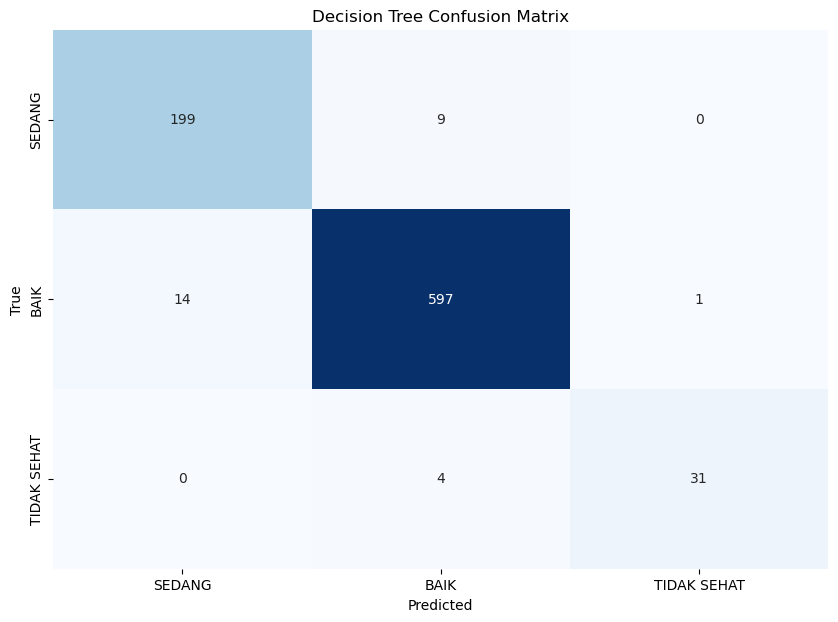

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, DT_predict)

# Create a DataFrame for better visualization
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Plot the stacked bar chart using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [33]:
# fitting Random Forest model on dataset
RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train, y_train)

# Getting prediction on Training Dataset
RF_trainpredict=RF_class.predict(x_train)
# Computing Model Accuracy
print("Training Dataset\n")
print("Accuracy:",round(metrics.accuracy_score(y_train, RF_trainpredict),3) * 100, "%")
print ("---------------")
# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_train, RF_trainpredict))
# Model detailed classification report
print ("---------------")
print("\nRandom Forest Classification report for Training Dataset\n", metrics.classification_report(y_train, RF_trainpredict,target_names =['SEDANG', 'BAIK', 'TIDAK SEHAT']))
print("\n--------------------------------------------------------------------------------------------------\n")


# Getting prediction on Testing Dataset
RF_predict=RF_class.predict(x_test)
# Computing Model Accuracy
print("Testing Dataset\n")
print("Accuracy:",round(metrics.accuracy_score(y_test, RF_predict),3) * 100, "%")
print ("---------------")
# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_test, RF_predict))
# Model detailed classification report
print ("---------------")
print("\nRandom Forest Classification report for Testing Dataset\n", metrics.classification_report(y_test, RF_predict,target_names =['SEDANG', 'BAIK', 'TIDAK SEHAT']))

Training Dataset

Accuracy: 96.89999999999999 %
---------------
Confusion matrix
---------------
[[ 800   46    0]
 [  44 2409    0]
 [   0   15  104]]
---------------

Random Forest Classification report for Training Dataset
               precision    recall  f1-score   support

      SEDANG       0.95      0.95      0.95       846
        BAIK       0.98      0.98      0.98      2453
 TIDAK SEHAT       1.00      0.87      0.93       119

    accuracy                           0.97      3418
   macro avg       0.97      0.93      0.95      3418
weighted avg       0.97      0.97      0.97      3418


--------------------------------------------------------------------------------------------------

Testing Dataset

Accuracy: 95.39999999999999 %
---------------
Confusion matrix
---------------
[[192  16   0]
 [ 19 593   0]
 [  0   4  31]]
---------------

Random Forest Classification report for Testing Dataset
               precision    recall  f1-score   support

      SEDANG       0

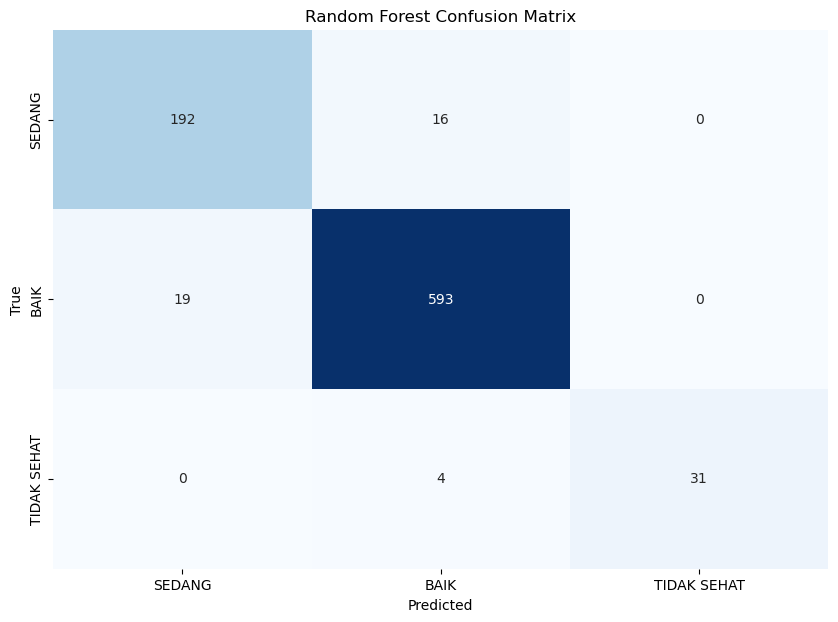

In [34]:
# Generate confusion matrix
RF_conf_matrix = confusion_matrix(y_test, RF_predict)

# Create a DataFrame for better visualization
RF_conf_df = pd.DataFrame(RF_conf_matrix, index=class_names, columns=class_names)

# Plot the stacked bar chart using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(RF_conf_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [35]:
# fitting Gradient Boost model on dataset
GradientBoost_class = GradientBoostingClassifier()
GradientBoost_class.fit(x_train, y_train)

# Getting prediction on Training Dataset
GB_trainpredict = GradientBoost_class.predict(x_train)
# Computing Model Accuracy
print("Training Dataset\n")
print("Accuracy:",round(metrics.accuracy_score(y_train, GB_trainpredict),3) * 100, "%")
print ("---------------")
# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_train, GB_trainpredict))
# Model detailed classification report
print ("---------------")
print("\nGradient Boost Classification report for Training Dataset\n", metrics.classification_report(y_train, GB_trainpredict,target_names =['SEDANG', 'BAIK', 'TIDAK SEHAT']))
print("\n--------------------------------------------------------------------------------------------------\n")

# Getting prediction on Testing Dataset
GB_predict = GradientBoost_class.predict(x_test)
# Computing Model Accuracy
print("Testing Dataset\n")
print("Accuracy:",round(metrics.accuracy_score(y_test, GB_predict),3) * 100, "%")
print ("---------------")
# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_test, GB_predict))
# Model detailed classification report
print ("---------------")
print("\nGradient Boost Classification report for Testing Dataset\n", metrics.classification_report(y_test, GB_predict,target_names =['SEDANG', 'BAIK', 'TIDAK SEHAT']))

Training Dataset

Accuracy: 99.0 %
---------------
Confusion matrix
---------------
[[ 830   16    0]
 [  16 2437    0]
 [   0    1  118]]
---------------

Gradient Boost Classification report for Training Dataset
               precision    recall  f1-score   support

      SEDANG       0.98      0.98      0.98       846
        BAIK       0.99      0.99      0.99      2453
 TIDAK SEHAT       1.00      0.99      1.00       119

    accuracy                           0.99      3418
   macro avg       0.99      0.99      0.99      3418
weighted avg       0.99      0.99      0.99      3418


--------------------------------------------------------------------------------------------------

Testing Dataset

Accuracy: 97.2 %
---------------
Confusion matrix
---------------
[[201   7   0]
 [ 13 599   0]
 [  0   4  31]]
---------------

Gradient Boost Classification report for Testing Dataset
               precision    recall  f1-score   support

      SEDANG       0.94      0.97      0.95 

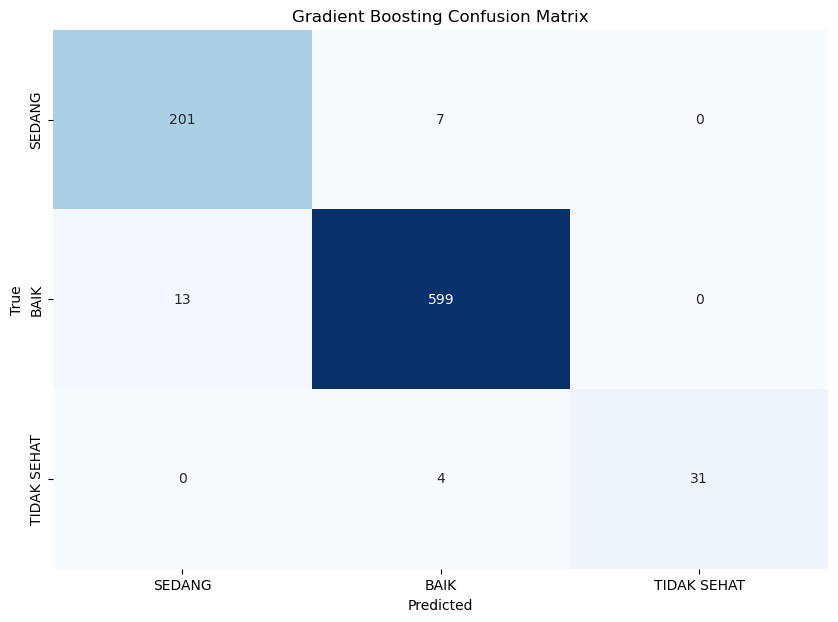

In [36]:
# Generate confusion matrix
GB_conf_matrix = confusion_matrix(y_test, GB_predict)

# Create a DataFrame for better visualization
GB_conf_df = pd.DataFrame(GB_conf_matrix, index=class_names, columns=class_names)

# Plot the stacked bar chart using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(GB_conf_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

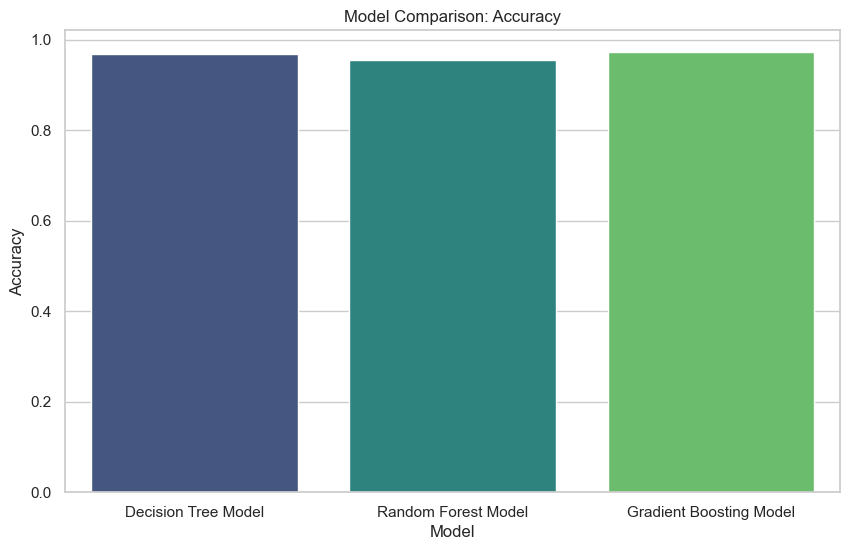

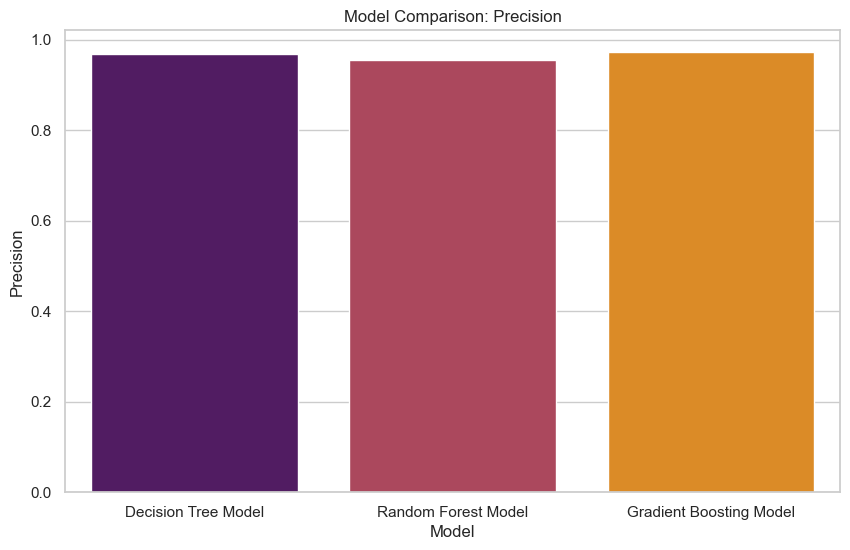

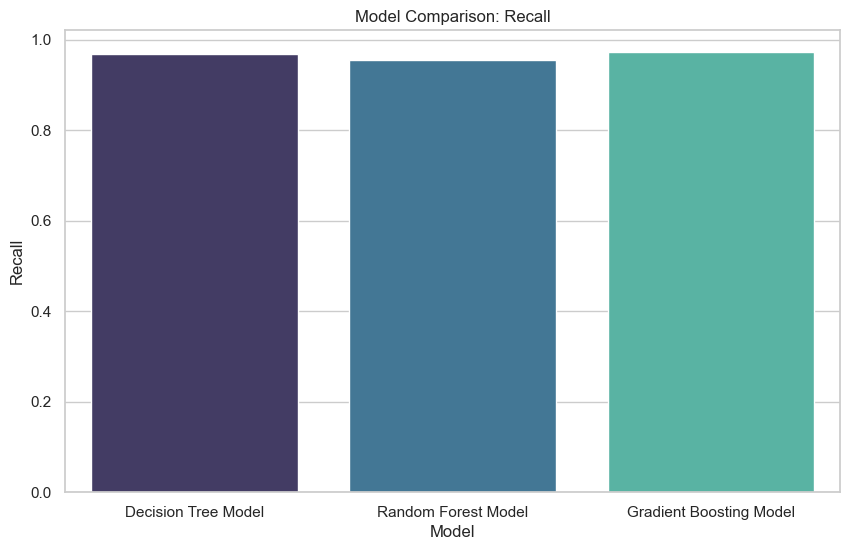

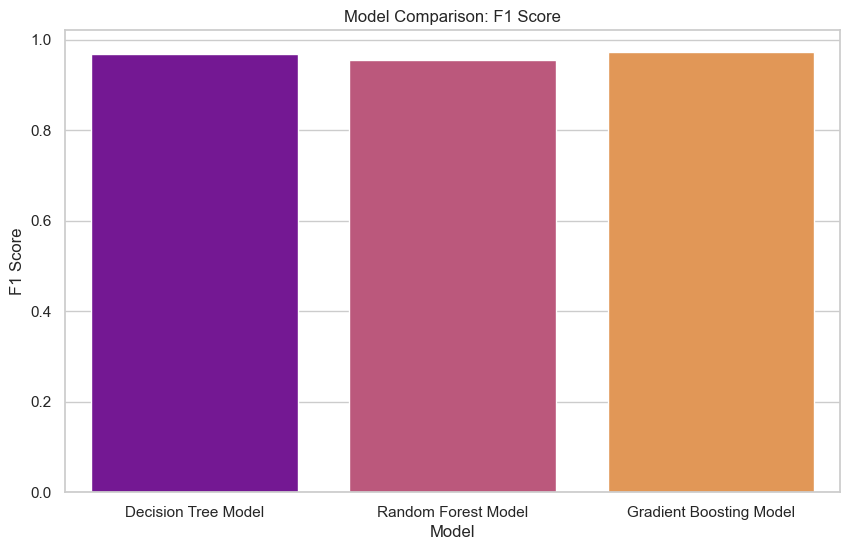

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate models (testing dataset)

# Decision Tree

DT_accuracy = accuracy_score(y_test, DT_predict)
DT_precision = precision_score(y_test, DT_predict, average='weighted')
DT_recall = recall_score(y_test, DT_predict, average='weighted')
DT_f1score = f1_score(y_test, DT_predict, average='weighted')

# Random Forest

RF_accuracy = accuracy_score(y_test, RF_predict)
RF_precision = precision_score(y_test, RF_predict, average='weighted')
RF_recall = recall_score(y_test, RF_predict, average='weighted')
RF_f1score = f1_score(y_test, RF_predict, average='weighted')

# Gradient Boosting

GB_accuracy = accuracy_score(y_test, GB_predict)
GB_precision = precision_score(y_test, GB_predict, average='weighted')
GB_recall = recall_score(y_test, GB_predict, average='weighted')
GB_f1score = f1_score(y_test, GB_predict, average='weighted')

model_metrics = pd.DataFrame({
    'Model': ['Decision Tree Model', 'Random Forest Model', 'Gradient Boosting Model'],
    'Accuracy': [DT_accuracy, RF_accuracy, GB_accuracy],
    'Precision': [DT_precision, RF_precision, GB_precision],
    'Recall': [DT_recall, RF_recall, GB_recall],
    'F1 Score': [DT_f1score, RF_f1score, GB_f1score],
})

sns.set(style="whitegrid")

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_metrics, palette='viridis')
plt.title('Model Comparison: Accuracy')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=model_metrics, palette='inferno')
plt.title('Model Comparison: Precision')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=model_metrics, palette='mako')
plt.title('Model Comparison: Recall')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=model_metrics, palette='plasma')
plt.title('Model Comparison: F1 Score')
plt.show()